### Extract All Links that Contain dc/sessions

In [2]:
from urllib import request

In [3]:
from bs4 import BeautifulSoup

In [4]:
webpage = request.urlopen("https://tdwi.org/events/seminars/dc").read()

In [5]:
webpage

b' \r\n\r\n<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    \r\n<title>TDWI Advanced Skills for Big Data Practitioners Seminar \xe2\x80\x93 D.C./ Virtual Classroom | Transforming Data with Intelligence</title>\r\n<meta name="description" content="<h4 class=&#34;title&#34;>Advanced Skills for Big Data Practitioners</h4><div class=&#34;info&#34;><h5 class=&#34;location&#34;>Washington, DC</h5><h5 class=&#34;date&#34;>April 30&ndash;May 2, 2018</h5><img src=&#34;https://download.1105media.com/tdwi/Remote-assets/Events/ico_virtualclass.png&#34; height=&#34;40&#34; width=&#34;126&#34;></div><p>Take your skills to the next level with a three-day seminar that covers lots of ground: hands-on Hadoop, creating value with non-traditional data sets, machine learning with big data, roadmap planning, and a workshop on big data implementation. </p><div class=&#34;cta&#34;><a class=&#34;more_btn&#34; href=&#34;/events/seminars/dc/home.aspx&#34;>more</a></div>">\r\n<meta name="keywords" content="analytics, d

In [6]:
schedule = BeautifulSoup(webpage,'html.parser')

In [7]:
schedule.find_all('a',href=True)

[<a class="close" href="#"><span></span><span></span><span></span><span></span></a>,
 <a href="/events/seminars/upcoming.aspx" title="TDWI Seminars">&lt; TDWI Seminars</a>,
 <a href="/events/seminars/dc/home.aspx">TDWI DC Seminar</a>,
 <a href="/events/seminars/dc/home.aspx#agenda">Agenda</a>,
 <a href="/events/seminars/dc/home.aspx#pricing">Pricing</a>,
 <a href="/events/seminars/dc/home.aspx#location">Location</a>,
 <a href="http://www.eiseverywhere.com/dc18">Register</a>,
 <a class="cta_btn" href="http://www.eiseverywhere.com/dc18">Register Now</a>,
 <a href="/events/seminars/dc/home.aspx">TDWI<br>
 Washington, DC<br>
 Seminar</br></br></a>,
 <a class="cta_btn_w" href="#virtual">Learn More</a>,
 <a href="/events/seminars/dc/speakers/speaker-window.aspx?speakerid={a5456aae-3910-4be3-aef2-7a9995f709db}&amp;id={0f98cb11-7e69-46b2-b37e-3f43b6600a89}}"><img alt="" height="105" src="/~/media/TDWI/TDWI Events/Images/Speaker_105/krishnan_krish_105.jpg" style="float: left;" width="105"/></a>

In [8]:
base_url = "https://tdwi.org"

In [9]:
urls = [base_url+a['href'] for a in schedule.find_all('a', href=True)  if 'dc/sessions' in a['href']]

In [10]:
urls

['https://tdwi.org/events/seminars/dc/sessions/monday/tdwi-big-data-fundamentals-creating-value-from-non-traditional-data-sets.aspx',
 'https://tdwi.org/events/seminars/dc/sessions/monday/big-data-road-maps.aspx',
 'https://tdwi.org/events/seminars/dc/sessions/tuesday/data-warehousing-in-the-age-of-analytics-and-big-data-hadoop-and-the-data-warehouse.aspx',
 'https://tdwi.org/events/seminars/dc/sessions/tuesday/machine-and-deep-learning-delivering-insights-from-big-data.aspx',
 'https://tdwi.org/events/seminars/dc/sessions/wednesday/hands-on-hadoop.aspx',
 'https://tdwi.org/events/seminars/dc/sessions/wednesday/workshop-big-data-implementation.aspx']

### Scrape the page where there is an abstract

In [11]:
urls[0]

'https://tdwi.org/events/seminars/dc/sessions/monday/tdwi-big-data-fundamentals-creating-value-from-non-traditional-data-sets.aspx'

### Preprocessing Function 3 - url

In [105]:
abstract_webpage = request.urlopen(urls[5]).read()

### _______________________________

In [106]:
abstract_webpage

b' \r\n\r\n<!DOCTYPE html>\r\n<html>\r\n<head>\r\n    \r\n<title>Workshop: Big Data Implementation | Transforming Data with Intelligence</title>\r\n<meta name="description" content="TDWI leader in analytics, business intelligence, and data management education, training, and research.">\r\n<meta name="keywords" content="analytics, data management, data science, data warehousing, business intelligence, the data warehousing institute, tdwi, certified business intelligence professionals, cbip, world conferences, business intelligence journal">\r\n\r\n<meta property="og:title" content="Workshop: Big Data Implementation | Transforming Data with Intelligence" />\r\n<meta property="og:description" content="" />\r\n<meta property="og:url" content="https://tdwi.org/events/seminars/dc/sessions/wednesday/workshop-big-data-implementation.aspx" />\r\n<meta property="og:image" content="" />\r\n<meta property="og:site_name" content="Transforming Data with Intelligence" />\r\n\r\n    <!-- BEGIN Google

### Preprocessing Function 4

In [107]:
abstract = BeautifulSoup(abstract_webpage,'html.parser')

### _________________________

In [108]:
abstract


<!DOCTYPE html>

<html>
<head>
<title>Workshop: Big Data Implementation | Transforming Data with Intelligence</title>
<meta content="TDWI leader in analytics, business intelligence, and data management education, training, and research." name="description">
<meta content="analytics, data management, data science, data warehousing, business intelligence, the data warehousing institute, tdwi, certified business intelligence professionals, cbip, world conferences, business intelligence journal" name="keywords">
<meta content="Workshop: Big Data Implementation | Transforming Data with Intelligence" property="og:title"/>
<meta content="" property="og:description"/>
<meta content="https://tdwi.org/events/seminars/dc/sessions/wednesday/workshop-big-data-implementation.aspx" property="og:url"/>
<meta content="" property="og:image"/>
<meta content="Transforming Data with Intelligence" property="og:site_name"/>
<!-- BEGIN Google Partner Tag HEAD CODE -->
<script type="text/javascript">
(functio

Extract the abstract element

### Preprocessing Function 5

In [109]:
abstract_element = abstract.find("p", {"id" : "contentbox2_0_Content"}).text

### _________________________

In [110]:
abstract_element

'Data-Driven Decisions\n\nData Value Chain.\nInterrogating A Cross-Organizational Data Set.\nMigration from silos to an integrated raw data landscape.\n\n\xa0Big Data Technological Landscape\n\nEcosystem Essentials: \n\nUnderstanding  technologies and vendors\nDefining  the value of distributed computing \nTechnology  stacks.\nSelection  Criteria\n\nData Swamp, Data Lake and Data Hubs.\n\n\xa0The Intersection of Data Science and Big Data\n\nData Science Practice – Teams and Skills\nDefining the Data Warehouse Goals for Data Science.\nArtificial Intelligence and Machine Learning Intersects.\nMonetizing Data.\nPitfalls of Big Data.\nChallenges and Barriers.\n\n\xa0Big Data Resources and HR\n\nBuilding an internal team for data science.\nHiring Data Science Team Members.\nData Science Teams Success Goals.\n\nNew Directions and Opportunities for Innovation\n\nNew business opportunities.\nLeveraging Big Data.\nLeadership development.\nInnovation Lab: how to take a problem, solve it, and pus

In [18]:
type(abstract_element)

str

### Text Processing

In [19]:
import nltk

In [20]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### Convert Abstract into Tokens

### Preprocessing Function 1

In [21]:
from nltk.tokenize import RegexpTokenizer

In [22]:
### ________________________

In [23]:
tokenizer = RegexpTokenizer(r'\w+')

### Preprocessing Function 6 - tokenize

In [24]:
tokens = tokenizer.tokenize(abstract_element)

### ____________________________________

In [25]:
tokens

['Big',
 'data',
 'is',
 'a',
 'hot',
 'topic',
 'in',
 'BI',
 'and',
 'analytics',
 'Yet',
 'it',
 'is',
 'a',
 'complex',
 'topic',
 'that',
 'is',
 'still',
 'in',
 'the',
 'early',
 'stages',
 'of',
 'evolution',
 'Successful',
 'big',
 'data',
 'projects',
 'that',
 'deliver',
 'real',
 'business',
 'value',
 'are',
 'challenged',
 'by',
 'multiple',
 'definitions',
 'and',
 'rapidly',
 'shifting',
 'technologies',
 'Achieving',
 'good',
 'return',
 'on',
 'your',
 'big',
 'data',
 'investment',
 'requires',
 'strategy',
 'that',
 'focuses',
 'on',
 'purpose',
 'people',
 'and',
 'process',
 'before',
 'exploring',
 'data',
 'and',
 'technologies',
 'Strategy',
 'drives',
 'planning',
 'and',
 'architecture',
 'to',
 'ensure',
 'that',
 'big',
 'data',
 'complements',
 'and',
 'does',
 'not',
 'disrupt',
 'the',
 'existing',
 'BI',
 'and',
 'analytics',
 'environment',
 'To',
 'prepare',
 'for',
 'success',
 'with',
 'big',
 'data',
 'start',
 'by',
 'understanding',
 'all',
 'of'

### Preprocessing Function 7 - make lower case 

In [26]:
lower_tokens = [tok.lower() for tok in tokens]

In [27]:
lower_tokens

['big',
 'data',
 'is',
 'a',
 'hot',
 'topic',
 'in',
 'bi',
 'and',
 'analytics',
 'yet',
 'it',
 'is',
 'a',
 'complex',
 'topic',
 'that',
 'is',
 'still',
 'in',
 'the',
 'early',
 'stages',
 'of',
 'evolution',
 'successful',
 'big',
 'data',
 'projects',
 'that',
 'deliver',
 'real',
 'business',
 'value',
 'are',
 'challenged',
 'by',
 'multiple',
 'definitions',
 'and',
 'rapidly',
 'shifting',
 'technologies',
 'achieving',
 'good',
 'return',
 'on',
 'your',
 'big',
 'data',
 'investment',
 'requires',
 'strategy',
 'that',
 'focuses',
 'on',
 'purpose',
 'people',
 'and',
 'process',
 'before',
 'exploring',
 'data',
 'and',
 'technologies',
 'strategy',
 'drives',
 'planning',
 'and',
 'architecture',
 'to',
 'ensure',
 'that',
 'big',
 'data',
 'complements',
 'and',
 'does',
 'not',
 'disrupt',
 'the',
 'existing',
 'bi',
 'and',
 'analytics',
 'environment',
 'to',
 'prepare',
 'for',
 'success',
 'with',
 'big',
 'data',
 'start',
 'by',
 'understanding',
 'all',
 'of'

### Preprocessing Function 2

In [28]:
from nltk.corpus import stopwords

### _________________________________________

### Preprocessing Function 9 - remove stop words

In [29]:
stopwords = stopwords.words('english')

### __________________________________

In [30]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Preprocessing Function 10 - remove stop words

In [31]:
nostop_tokens = [tok for tok in lower_tokens if tok not in stopwords]

### __________________________________________________

In [32]:
nostop_tokens

['big',
 'data',
 'hot',
 'topic',
 'bi',
 'analytics',
 'yet',
 'complex',
 'topic',
 'still',
 'early',
 'stages',
 'evolution',
 'successful',
 'big',
 'data',
 'projects',
 'deliver',
 'real',
 'business',
 'value',
 'challenged',
 'multiple',
 'definitions',
 'rapidly',
 'shifting',
 'technologies',
 'achieving',
 'good',
 'return',
 'big',
 'data',
 'investment',
 'requires',
 'strategy',
 'focuses',
 'purpose',
 'people',
 'process',
 'exploring',
 'data',
 'technologies',
 'strategy',
 'drives',
 'planning',
 'architecture',
 'ensure',
 'big',
 'data',
 'complements',
 'disrupt',
 'existing',
 'bi',
 'analytics',
 'environment',
 'prepare',
 'success',
 'big',
 'data',
 'start',
 'understanding',
 'pieces',
 'fit',
 'together',
 'learn',
 'common',
 'definitions',
 'big',
 'data',
 'implications',
 'key',
 'characteristics',
 'big',
 'data',
 'size',
 'among',
 'top',
 'five',
 'structures',
 'found',
 'unstructured',
 'data',
 'types',
 'big',
 'data',
 'sources',
 'streaming'

### Preprocessing Function 8 - Stem

In [33]:
lancaster = nltk.LancasterStemmer()

In [34]:
stemmed_tokens = [lancaster.stem(t) for t in nostop_tokens]

### _________________________________

In [35]:
stemmed_tokens

['big',
 'dat',
 'hot',
 'top',
 'bi',
 'analys',
 'yet',
 'complex',
 'top',
 'stil',
 'ear',
 'stag',
 'evolv',
 'success',
 'big',
 'dat',
 'project',
 'del',
 'real',
 'busy',
 'valu',
 'challeng',
 'multipl',
 'definit',
 'rapid',
 'shift',
 'technolog',
 'achiev',
 'good',
 'return',
 'big',
 'dat',
 'invest',
 'requir',
 'strategy',
 'focus',
 'purpos',
 'peopl',
 'process',
 'expl',
 'dat',
 'technolog',
 'strategy',
 'driv',
 'plan',
 'architect',
 'ens',
 'big',
 'dat',
 'compl',
 'disrupt',
 'ex',
 'bi',
 'analys',
 'environ',
 'prep',
 'success',
 'big',
 'dat',
 'start',
 'understand',
 'piec',
 'fit',
 'togeth',
 'learn',
 'common',
 'definit',
 'big',
 'dat',
 'imply',
 'key',
 'charact',
 'big',
 'dat',
 'siz',
 'among',
 'top',
 'fiv',
 'structures',
 'found',
 'unstruct',
 'dat',
 'typ',
 'big',
 'dat',
 'sourc',
 'streaming',
 'dat',
 'soc',
 'dat',
 'sens',
 'dat',
 'etc',
 'valu',
 'opportun',
 'common',
 'apply',
 'big',
 'dat',
 'consid',
 'adapt',
 'architect',


### Create a Preprocessing Function/Loop for an Abstract & Run the Function

In [114]:
def abstract_preprocess(url):
    
    from nltk.tokenize import RegexpTokenizer
    from nltk.corpus import stopwords
    
    abstract_webpage = request.urlopen(url).read()
    abstract = BeautifulSoup(abstract_webpage,'html.parser')
    abstract_element = abstract.find("p", {"id" : "contentbox2_0_Content"}).text
    
    tokens = tokenizer.tokenize(abstract_element)
    
    lower_tokens = [tok.lower() for tok in tokens]
    
    stopwords = stopwords.words('english')
    nostop_tokens = [tok for tok in lower_tokens if tok not in stopwords]
    
    lancaster = nltk.LancasterStemmer()
    stemmed_tokens = [lancaster.stem(t) for t in nostop_tokens]
    
    return(nostop_tokens)

abstract_preprocess("https://tdwi.org/events/seminars/dc/sessions/monday/tdwi-big-data-fundamentals-creating-value-from-non-traditional-data-sets.aspx")

['big',
 'data',
 'hot',
 'topic',
 'bi',
 'analytics',
 'yet',
 'complex',
 'topic',
 'still',
 'early',
 'stages',
 'evolution',
 'successful',
 'big',
 'data',
 'projects',
 'deliver',
 'real',
 'business',
 'value',
 'challenged',
 'multiple',
 'definitions',
 'rapidly',
 'shifting',
 'technologies',
 'achieving',
 'good',
 'return',
 'big',
 'data',
 'investment',
 'requires',
 'strategy',
 'focuses',
 'purpose',
 'people',
 'process',
 'exploring',
 'data',
 'technologies',
 'strategy',
 'drives',
 'planning',
 'architecture',
 'ensure',
 'big',
 'data',
 'complements',
 'disrupt',
 'existing',
 'bi',
 'analytics',
 'environment',
 'prepare',
 'success',
 'big',
 'data',
 'start',
 'understanding',
 'pieces',
 'fit',
 'together',
 'learn',
 'common',
 'definitions',
 'big',
 'data',
 'implications',
 'key',
 'characteristics',
 'big',
 'data',
 'size',
 'among',
 'top',
 'five',
 'structures',
 'found',
 'unstructured',
 'data',
 'types',
 'big',
 'data',
 'sources',
 'streaming'

In [115]:
abstracts = [abstract_preprocess(url) for url in urls]

In [116]:
len(abstracts)

6

In [47]:
type(abstracts)

list

In [119]:
abstracts[2]

['digital',
 'age',
 'brought',
 'several',
 'tipping',
 'points',
 'perspectives',
 'world',
 'data',
 'today',
 'sizes',
 'formats',
 'types',
 'classes',
 'data',
 'generated',
 'need',
 'infrastructure',
 'capture',
 'transform',
 'analyze',
 'quickly',
 'created',
 'rapidly',
 'evolving',
 'technology',
 'landscape',
 'integrated',
 'storage',
 'compute',
 'infrastructure',
 'programming',
 'platforms',
 'perspective',
 'driven',
 'hadoop',
 'nosql',
 'infrastructures',
 'business',
 'advantage',
 'produce',
 'might',
 'wondering',
 'whether',
 'organization',
 'even',
 'needs',
 'data',
 'warehouse',
 'data',
 'warehouse',
 'handle',
 'new',
 'demands',
 'digital',
 'age',
 'session',
 'lays',
 'ground',
 'work',
 'understanding',
 'framework',
 'create',
 'manage',
 'data',
 'warehouse',
 'age',
 'big',
 'data',
 'learn',
 'data',
 'warehouse',
 'goals',
 'exploratory',
 'analytics',
 'farming',
 'data',
 'integrated',
 'information',
 'platform',
 'available',
 'usable',
 'leve

### Print the Results for All the Abstracts

In [121]:
print(abstracts)

[['big', 'data', 'hot', 'topic', 'bi', 'analytics', 'yet', 'complex', 'topic', 'still', 'early', 'stages', 'evolution', 'successful', 'big', 'data', 'projects', 'deliver', 'real', 'business', 'value', 'challenged', 'multiple', 'definitions', 'rapidly', 'shifting', 'technologies', 'achieving', 'good', 'return', 'big', 'data', 'investment', 'requires', 'strategy', 'focuses', 'purpose', 'people', 'process', 'exploring', 'data', 'technologies', 'strategy', 'drives', 'planning', 'architecture', 'ensure', 'big', 'data', 'complements', 'disrupt', 'existing', 'bi', 'analytics', 'environment', 'prepare', 'success', 'big', 'data', 'start', 'understanding', 'pieces', 'fit', 'together', 'learn', 'common', 'definitions', 'big', 'data', 'implications', 'key', 'characteristics', 'big', 'data', 'size', 'among', 'top', 'five', 'structures', 'found', 'unstructured', 'data', 'types', 'big', 'data', 'sources', 'streaming', 'data', 'social', 'data', 'sensor', 'data', 'etc', 'value', 'opportunities', 'commo

### Create WordCloud

In [128]:
from wordcloud import WordCloud

### Combine All Tokens of an Abstract into a String

In [129]:
" ".join(abstracts[0])

'big data hot topic bi analytics yet complex topic still early stages evolution successful big data projects deliver real business value challenged multiple definitions rapidly shifting technologies achieving good return big data investment requires strategy focuses purpose people process exploring data technologies strategy drives planning architecture ensure big data complements disrupt existing bi analytics environment prepare success big data start understanding pieces fit together learn common definitions big data implications key characteristics big data size among top five structures found unstructured data types big data sources streaming data social data sensor data etc value opportunities common applications big data considerations adapting architectures organizations cultures incorporate big data scope big data processes tools technologies geared business data analysts bi analytics program project managers bi data warehouse architects designers developers data governance dat

### Create WorldCloud

In [133]:
wc = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(" ".join(abstracts[0]))

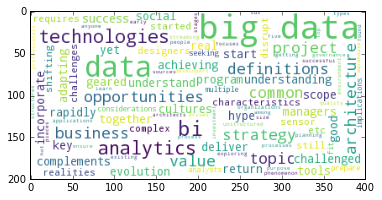

In [138]:
import matplotlib.pyplot as plt
plt.imshow(wc)

### Show the Figures in the Notebook

In [137]:
%matplotlib inline